## [웹크롤링 _ 나무위키 사이트 분석 및 시각화]
### <Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기

[웹크롤링 라이브러리 사용하기]
- 파이썬에서는 BeautifulSoup와 requests 라는 라이브러리로 웹 크롤러를 만들 수 있음
- requests는 특정 url로부터 html 문서를 가져오는 작업을 수행
- 나무위키와 같은 페이지는 html 문서가 javascript로 동적 로딩되는 경우가 있음
- requests 대신 셀레니움(selenium) 라이브러리를 이용해 크롬 브라우저로 동적 웹크롤링 수행
- selenium은 웹 브라우저를 자동으로 구동해주는 라이브러리
- selenium을 사용하기 위해 크롬 드라이버를 이용해 크롬 브라우저 자동으로 구동 => 크롬드라이버 필요

### [BeautifulSoup와 selenium을 이용한 웹 크롤링]
- anaconda prompt 혹은 terminal 에서 아래와 같은 패키지들을 설치
- pip install selenium
- pip install beautifulsoup4

### [크롬 브라우저 업데이트 및 크롬 드라이버 설치]
- 크롬 브라우저 설정해서 최신 버전으로 업데이트
- 크롬 드라이버 사이트에서 브라우저 버전에 맞는 드라이버 다운로드
    - https://chromedriver.chromium.org/downloads
- chromedriver.exe 파일을 노트북 파일 경로에 이동 



In [1]:
!pip install selenium

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### BeautifulSoup의 select() VS find_all()
- html 의 특정 요소 선택
- select, select_one 의 경우 css 선택자를 이용하는 것처럼 사용 가능
- select의 경우 후손이나 자손 요소를 css처럼 선택 가능
- 예) soup.select("dl>dt>a")
- find_all, find의 경우 하나의 태그(name="table")나 하나의 클래스(class="tables")를 선택
- find 의 경우 후손이나 자손 요소를 직접 선택할 수 없어 한 번 더 변수에 담든지 루프 문을 이용해야 함
- 예) find_all(class = "ah_roll"), find(name="table")

In [3]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re #정규식 표현을 위한 모듈 

In [4]:
#윈도우용 크롬 웹드라이버 실행 경로 (windows)지정
excutable_path = "chromedriver.exe"
driver = webdriver.Chrome(executable_path = excutable_path)



#사이트의 html 구조에 기반하여 크롤링을 수행
source_url = "https://namu.wiki/RecentChanges" #크롤링할 사이트 주소를 정의
driver.get(source_url) #크롬 드라이버를 통해 url의 html 문서 가져옴


#영진씨방법
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
element = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME, "app")))

# #명진씨방법
# import time
# time.sleep(10)


req = driver.page_source #전체페이지 
print(req)

<html><head><link href="/skins/senkawa/6.0ec579cd0a387a25b691.css" rel="stylesheet"><link href="/skins/senkawa/3.674762a86506f6736eaa.css" rel="stylesheet"><script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script><style type="text/css">.resize-observer[data-v-b329ee4c]{position:absolute;top:0;left:0;z-index:-1;width:100%;height:100%;border:none;background-color:transparent;pointer-events:none;display:block;overflow:hidden;opacity:0}.resize-observer[data-v-b329ee4c] object{display:block;position:absolute;top:0;left:0;height:100%;width:100%;overflow:hidden;pointer-events:none;z-index:-1}</style><link rel="stylesheet" type="text/css" href="/skins/senkawa/10.5c04303735c3a9491b9d.css"><script charset="utf-8" src="/skins/senkawa/10.5c04303735c3a9491b9d.js"></script><title>최근 변경내역 - 나무위키</title><link data-n-head="1" rel="canonical" href="https://namu.wiki/RecentChanges"><link data-n-head="1" rel="search" type="application/opensearchdescription+xml" title="나무위키" href="/opensearch.xml"><

In [5]:
soup = BeautifulSoup(req, "html.parser") #BeautifulSoup 의 soup로 가공 
soup

<html><head><link href="/skins/senkawa/6.0ec579cd0a387a25b691.css" rel="stylesheet"/><link href="/skins/senkawa/3.674762a86506f6736eaa.css" rel="stylesheet"/><script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script><style type="text/css">.resize-observer[data-v-b329ee4c]{position:absolute;top:0;left:0;z-index:-1;width:100%;height:100%;border:none;background-color:transparent;pointer-events:none;display:block;overflow:hidden;opacity:0}.resize-observer[data-v-b329ee4c] object{display:block;position:absolute;top:0;left:0;height:100%;width:100%;overflow:hidden;pointer-events:none;z-index:-1}</style><link href="/skins/senkawa/10.5c04303735c3a9491b9d.css" rel="stylesheet" type="text/css"/><script charset="utf-8" src="/skins/senkawa/10.5c04303735c3a9491b9d.js"></script><title>최근 변경내역 - 나무위키</title><link data-n-head="1" href="https://namu.wiki/RecentChanges" rel="canonical"/><link data-n-head="1" href="/opensearch.xml" rel="search" title="나무위키" type="application/opensearchdescription+xm

In [6]:
contents_table = soup.find(name="table") #find 함수를 이용해 태그명이 table인 것을 찾기
table_body = contents_table.find(name= "tbody") #table 안 tbody 태그인 것 찾기
table_rows = table_body.find_all(name="tr") #table tbody 안 tr태그인 것 찾기 => [ ]의 요소로 담김 
#table_body
table_rows[0]


<tr class="" data-v-089a8ed2=""><td data-v-089a8ed2=""><a data-v-089a8ed2="" href="/w/%EB%B0%95%EA%B1%B4(%EC%9D%BC%EA%B8%B0%20%EC%8B%9C%EB%A6%AC%EC%A6%88)">박건(일기 시리즈)</a> <a data-v-089a8ed2="" href="/history/%EB%B0%95%EA%B1%B4(%EC%9D%BC%EA%B8%B0%20%EC%8B%9C%EB%A6%AC%EC%A6%88)">[역사]</a> <a data-v-089a8ed2="" href="/diff/%EB%B0%95%EA%B1%B4(%EC%9D%BC%EA%B8%B0%20%EC%8B%9C%EB%A6%AC%EC%A6%88)?rev=545&amp;oldrev=544">[비교]</a> <a data-v-089a8ed2="" href="/discuss/%EB%B0%95%EA%B1%B4(%EC%9D%BC%EA%B8%B0%20%EC%8B%9C%EB%A6%AC%EC%A6%88)">[토론]</a> <span data-v-089a8ed2="">(<span class="dBSlb/Oz" data-v-089a8ed2="" data-v-6cbb5b59="">+34</span>)</span></td> <td data-v-089a8ed2=""><div class="v-popover" data-v-089a8ed2="" data-v-83dd8298=""><div aria-describedby="popover_6xaeshyvci" class="trigger" style="display: inline-block;"><a class="uK8CjXI+" data-v-83dd8298="">Adam95</a> </div> </div> <!-- --></td> <td data-v-089a8ed2=""><time data-v-089a8ed2="" datetime="2022-01-20T00:39:41.000Z">2022-01-20 09:

In [7]:
len(table_rows)

123

### [페이지 링크주소 리스트 가져오기]

In [8]:
#특성 속성 값을 추출
page_url_base = "https://namu.wiki" #베이스 url 정의
page_urls = [] # href 속성값을 담기 위한 빈 리스트  

for i in range(0, len(table_rows)): #table_rows의 길이만큼 반복
    first_td = table_rows[i].find_all('td')[0] #td가 3개 있는데 0번째에 원하는 href 가 있음 
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        #page_url = page_url_base + td_url[0].get('href') #나무위키주소+get() 태그가 가지고 있는 속성 추출 
        page_url = page_url_base + td_url[0].attrs["href"] #attrs[]는 딕셔너리 형태로 속성명과 속성값을 불러옴 
        if "png" not in page_url:
            page_urls.append(page_url)
          
        
page_urls = list(set(page_urls)) #중복 url 제거
for page in page_urls[:3]:
    print(page)

https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:laurie2.jpg
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:1_MNBWk2DNpiHBeRrziBbmIAb.jpg
https://namu.wiki/w/%EC%95%9E%EB%8B%B4%ED%99%94


### [각 링크 페이지내 텍스트 구조를 확인하여 제목, 카테고리, 내용 출력]

In [9]:
page_urls

['https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:laurie2.jpg',
 'https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:1_MNBWk2DNpiHBeRrziBbmIAb.jpg',
 'https://namu.wiki/w/%EC%95%9E%EB%8B%B4%ED%99%94',
 'https://namu.wiki/w/%EC%BC%80%EC%9D%B4%20%EC%B0%A8%ED%8A%B8/2018%EB%85%84%208%EC%9B%94%20%EC%9D%B4%ED%9B%84',
 'https://namu.wiki/w/%EC%BF%A0%ED%82%A4%EB%9F%B0:%20%ED%82%B9%EB%8D%A4/%EC%9C%A0%EB%AC%BC',
 'https://namu.wiki/w/%EC%97%90%EC%9D%B4%EC%A7%80%20%EC%98%A4%EB%B8%8C%20%EC%97%A0%ED%8C%8C%EC%9D%B4%EC%96%B4%204/%EA%B8%B0%EC%88%A0',
 'https://namu.wiki/w/%EB%8D%B0%EB%A6%AD%20%EB%A3%A8%EC%9D%B4%EC%8A%A4',
 'https://namu.wiki/w/%EB%82%A8%EC%84%B1%20%ED%8E%98%EB%AF%B8%EB%8B%88%EC%8A%A4%ED%8A%B8',
 'https://namu.wiki/w/Pok%C3%A9mon%20LEGENDS%20%EC%95%84%EB%A5%B4%EC%84%B8%EC%9A%B0%EC%8A%A4/%ED%8F%89%EA%B0%80',
 'https://namu.wiki/w/%EC%98%A4%EB%94%98(%EC%97%AC%EC%8B%A0%EC%A0%84%EC%83%9D%20%EC%8B%9C%EB%A6%AC%EC%A6%88)',
 'https://namu.wiki/w/%EB%A5%BC%EB%A5%B4%EC%8A%88%20%EB%9E%8C%ED%8E%98%EB%A5%B4%EC%A7%80/%E

### [각 링크 페이지내 텍스트 구조를 확인하여 제목, 카테고리, 내용 출력]

In [10]:
# 윈도우용 크롬 웹드라이버 실행경로(windows) 지정
excutable_path = "chromedriver.exe"
driver = webdriver.Chrome(executable_path = excutable_path)
#크롬 드라이버를 통해 page_urls[0]번째 사이트의 html 문서 가져옴 
driver.get(page_urls[0]) #page_urls[0]번쨰의 정보를 가져옴
req=driver.page_source #페이지 소스를 req에 저장 
soup = BeautifulSoup(req,'html.parser') #html.parser로 파싱
contents_table=soup.find(name="article") #article 태그 하나만 불러오기 

#타이틀 추출
title = contents_table.find_all('h1')[0]

#카테고리 추출
category = contents_table.find_all('ul')[0]
#contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"}) # div 태그 중 class 속성값이 wiki-paragraph
#div 태그 중 클래스이름이 wiki-paragraph인 요소 모두 추출
content_paragraphs = contents_table.select("div.wiki-paragraph") 


#내용으로 추출한 리스트를 하나의 문자열로 전처리
content_corpus_list = [] # 내용 중 텍스트만 담을 빈 리스트 생성 
for paragraphs in content_paragraphs: # content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
    content_corpus_list.append(paragraphs.text) #가져온 결과 태그 중 텍스트만 추출하여 content_corpus_list에 추가
content_corpus=" ".join(content_corpus_list) # "텍스트".join(리스트명)=> 리스트의 요소를 "텍스트"로 구분하여 하나의 문자열로 만듦

print(title.text) #제목출력 
print("\n")
print(category.text) #카테고리 출력
print("\n")
print(content_corpus) #내용출력

#크롤링에 사용한 브라우저를 종료합니다
driver.close()
    

파일:laurie2.jpg 


파일/(여자)아이들


이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은 자유이용 저작물이 아닌, 독점적 저작권이 존재하는 이미지입니다. 나무위키는 본 이미지를 제한된 한도 안에서 이용합니다.※ 다음과 같은 사항을 참조하시기 바랍니다.권리자는 해당 이미지가 나무위키에 게시되어 권리자의 정당한 권리를 침해한다고 여겨진다면 문의 게시판에 문의해 주세요.해당 이미지를 업로드한 사용자는 자신의 행위에 대한 법적 책임이 부과될 수 있음을 숙지해 주세요. 권리자는 해당 이미지가 나무위키에 게시되어 권리자의 정당한 권리를 침해한다고 여겨진다면 문의 게시판에 문의해 주세요. 해당 이미지를 업로드한 사용자는 자신의 행위에 대한 법적 책임이 부과될 수 있음을 숙지해 주세요. 1. 기본 정보2. 이미지 설명 출처 출처를 반드시 삽입해 주세요. 날짜 이미지가 만들어진 날짜를 삽입해 주세요. 저작자 이미지의 저작자를 삽입해 주세요. 저작권 이미지의 저작권과 관련된 기타 정보를 삽입해 주세요. 기타 기타 정보가 있으면 삽입해 주세요.  이미지의 자세한 설명을 적어 주세요.  


### [각 링크 페이지 크롤링하여 제목, 카테고리, 내용 출력]

In [11]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비
columns = ["title", "category", "content_text"]
df = pd.DataFrame(columns=columns)

#for page_url in page_urls:
for i in range(10):
    # 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
    excutable_path = "chromedriver.exe"
    driver = webdriver.Chrome(executable_path=excutable_path)
    # 크롬 드라이버를 통해 page_urls[0]번째 사이트의 HTML 문서 가져옴
    #driver.get(page_url)  # page_urls[i],  page_url의 정보를 가져옴
    driver.get(page_urls[i])  # page_urls[i],  page_url의 정보를 가져옴
    req = driver.page_source # 페이지 소스를 req에 저장
    soup = BeautifulSoup(req, 'html.parser') # html.parser로 파싱
    contents_table = soup.find(name="article") #  불러온 소스에서 태그명이 article인 요소 하나만 추출

    ### 타이틀 추출
    title = contents_table.find_all('h1')[0] # 태그명이 h1인 모든 태그 추출, article h1
    if title is not None: #타이틀에 아무내용도 없으면 
        row_title = title.text.replace("\n", " ") #빈 칸으로 교체 
    else:
        row_title = ""
        
    ### 카테고리 추출
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all("ul")) > 0: # article ul 로 검색한 결과 여러 ul 결과가 나올 경우
        category = contents_table.find_all("ul")[0] # 제일 첫번째 article ul 을 category로 설정
    else:
        category = None
        
    if category is not None: #카테고리가 비어 있으면
        row_category = category.text.replace("\n", " ") #빈 칸으로 교체
    else:
        row_category = ""

    ### 내용 추출
    #contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})  
    #div  태그 중  class 속성값이  wiki-paragraph인 요소를 추출
    content_paragraphs = contents_table.select("div.wiki-paragraph")  
    #  내용으로 추출한 리스트를 하나의 문자열로 전처리
    content_corpus_list = [] # 내용 중 텍스트만 담을 빈 리스트 생성
    
    # content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")

    # 모든 정보를 하나의 데이터 프레임에 저장하기 위해서 시리즈 생성
    # 각 페이지의 정보를 추출하여 제목, 카테고리, 내용 순으로 행을 생성
    row = [row_title, row_category, "".join(content_corpus_list)]
    # 시리즈로 만듦
    series = pd.Series(row, index=df.columns)
    # 데이터 프레임에 시리즈를 추가, 한 페이지 당 하나의 행 추가
    df = df.append(series, ignore_index=True)
    
    # 크롤링에 사용한 브라우저를 종료합니다.
    driver.close()

In [12]:
df

,title,category,content_text
0,파일:laurie2.jpg,파일/(여자)아이들,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은...
1,파일:1_MNBWk2DNpiHBeRrziBbmIAb.jpg,파일/(여자)아이들,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은...
2,앞담화,속어 유행어,1. 개요2. 상세앞담화란 어떤 사람이 있는 자리에서 그 사람에 대한 험담을 하는 ...
3,케이 차트/2018년 8월 이후,케이 차트,이 문서는이 문단은 토론을 통해 목차에 접기 문법을 사용하기(으)로 합의되었습니다....
4,쿠키런: 킹덤/유물,쿠키런: 킹덤,"관련 문서: 쿠키런: 킹덤/길드, , , , , 게임 요소쿠키(특별한 인연) ..."
5,에이지 오브 엠파이어 4/기술,에이지 오브 엠파이어 시리즈,상위 문서: 에이지 오브 엠파이어 4게임 관련 정보유닛 · 건물 · 기...
6,데릭 루이스,미국의 종합격투기 선수1985년 출생뉴올리언스 출신 인물,종합격투기 관련 인물이름데릭 제임스 루이스(Derrick James Lewis)국적...
7,남성 페미니스트,페미니즘,가입 후 15일이 지나야 편집 가능한 문서입니다. 은(는) 여기로 연결됩니...
8,Pokémon LEGENDS 아르세우스/평가,Pokémon LEGENDS 아르세우스포켓몬스터/작품별 평가나무위키 포켓몬스터 프로젝트,상위 문서: Pokémon LEGENDS 아르세우스Pokémon LEGENDS...
9,오딘(여신전생 시리즈),여신전생 시리즈/악마,オーディン1. 개요2. 진 여신전생 시리즈2.1. 진 여신전생3 녹턴2.2. 진 여...


In [13]:
!pip install konlpy

In [14]:
import konlpy

In [15]:
!pip install pytagcloud pygame simplejson

In [16]:
import pytagcloud 

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


<article data-v-2b29d4aa="" data-v-49250b9a=""><!-- --> <!-- --> <div class="vSXEbTzr" data-v-49250b9a="" data-v-dc897e4a=""><div class="Fc2Lse6M" data-v-dc897e4a=""><a class="has-tooltip" data-original-title="null" data-v-dc897e4a="" href="/member/star/%EC%98%A4%EB%94%98(%EC%97%AC%EC%8B%A0%EC%A0%84%EC%83%9D%20%EC%8B%9C%EB%A6%AC%EC%A6%88)"><span class="ion-ios-star-outline t5cVrN1A" data-v-dc897e4a=""></span> 0</a> <!-- --> <a data-v-dc897e4a="" href="/backlink/%EC%98%A4%EB%94%98(%EC%97%AC%EC%8B%A0%EC%A0%84%EC%83%9D%20%EC%8B%9C%EB%A6%AC%EC%A6%88)">역링크</a> <a class="" data-v-dc897e4a="" href="/discuss/%EC%98%A4%EB%94%98(%EC%97%AC%EC%8B%A0%EC%A0%84%EC%83%9D%20%EC%8B%9C%EB%A6%AC%EC%A6%88)">토론</a> <a data-v-dc897e4a="" href="/edit/%EC%98%A4%EB%94%98(%EC%97%AC%EC%8B%A0%EC%A0%84%EC%83%9D%20%EC%8B%9C%EB%A6%AC%EC%A6%88)" rel="nofollow">편집</a> <a data-v-dc897e4a="" href="/history/%EC%98%A4%EB%94%98(%EC%97%AC%EC%8B%A0%EC%A0%84%EC%83%9D%20%EC%8B%9C%EB%A6%AC%EC%A6%88)">역사</a> <!-- --> <a data-v-dc
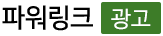
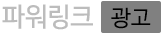

In [17]:
contents_table